
Uber and Lyft Dataset Boston, MA | Kaggle (57 columns, 60k rows)
https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

Uber Fares Dataset | Kaggle (9 columns, 200k rows)
https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [ ]:
!pip install -q kaggle
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas as pd
import os
from google.colab import drive

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
# download datasets from Kaggle
od.download("https://www.kaggle.com/datasets/yasserh/uber-fares-dataset")
od.download("https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 7.04M/7.04M [00:00<00:00, 68.4MB/s]

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 44.5M/44.5M [00:00<00:00, 85.1MB/s]


:{"username":"blakeandersonw","key":"5c7b7542c5ad7af0d6015b98bfa868b4"}

In [ ]:
# data set of uber data
os.chdir('/content/uber-fares-dataset')
data = pd.read_csv("uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Downloading dataset above, consists of 200000 uber rides, with important variables pickup/dropoff longitude/latitude, price, and datetime.

We likely will not use this dataset until later on.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### **LEARNING ABOUT THE DATASETS**



In [ ]:
# data set of uber and lyft data
os.chdir('/content/uber-and-lyft-dataset-boston-ma')
rs_data = pd.read_csv("rideshare_kaggle.csv")
rs_data

Downloading ridehsare data from Boston, MA during November 26, 2018 until December 18, 2018.  Comprehensive dataset with price, distance, pickup/dropoff, weather, etc.

In [ ]:
rs_data.dtypes

Checking variable types of dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# summary statistics on Lyft and Uber 
lyft_prices = rs_data.loc[rs_data["cab_type"] == "Lyft"]['price']
uber_prices = rs_data.loc[rs_data["cab_type"] == "Uber"]['price']

print('Lyft summary statistics\n', lyft_prices.describe(),'\n')
print('Uber summary statistics\n', uber_prices.describe())


Lyft summary statistics
 count    307408.000000
mean         17.351396
std          10.019171
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64 

Uber summary statistics
 count    330568.000000
mean         15.795343
std           8.560300
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64


Summary statistics of Uber vs Lyft prices - not super relevant, just interesting.

In [ ]:
def ride_cost(distance, mpg):
  gasoline_cost = (distance / (mpg/2))*3
  maintenance_cost = .10*distance
  depreciable_cost = .10*distance
  total_cost = gasoline_cost + maintenance_cost + depreciable_cost
  return(total_cost)

ridecost = []

for i in rs_data['distance']:
  ridecost.append(ride_cost(i, 20))

rs_data['ridecost'] = ridecost
rs_data['profit'] = rs_data['price'] - rs_data['ridecost']
pricesdata = rs_data[['price','ridecost','profit']]
pricesdata

,price,ridecost,profit
0,5.0,0.22,4.78
1,11.0,0.22,10.78
2,7.0,0.22,6.78
3,26.0,0.22,25.78
4,9.0,0.22,8.78
...,...,...,...
693066,13.0,0.50,12.50
693067,9.5,0.50,9.00
693068,NaN,0.50,NaN
693069,27.0,0.50,26.50


Barebones cost function implemented into a table containing price, ridecost, and expected profit.  Major improvements coming to this function in the future.

Text(0.5, 0, 'Distance')

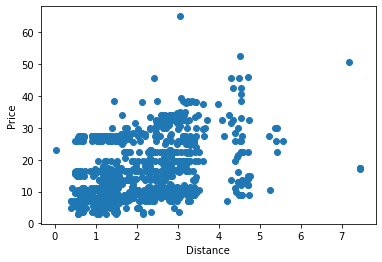

In [ ]:
p_vs_d = rs_data.sample(1000)

plt.scatter(p_vs_d['distance'], p_vs_d['price'])

plt.ylabel("Price")
plt.xlabel("Distance")

Plotting a random sample of 1000 price and distance points, visualizing relationship between price and distance.

In [ ]:
from datetime import datetime
a = datetime.strptime(rs_data['datetime'][1], "%Y-%m-%d %H:%M:%S")
weekday_list = []
for i in range(len(rs_data['datetime'])):
  weekday_list.append(datetime.strptime(rs_data['datetime'][i], "%Y-%m-%d %H:%M:%S").weekday())
rs_data['weekday'] = weekday_list

0-6 corresponds to Monday(0) through Sunday(6)

In [ ]:
rs_data_corr = rs_data.corr()
print(rs_data_corr['price'].sort_values(ascending=False)[:7], '\n')
print(rs_data_corr['price'].sort_values(ascending=True)[:7])

price               1.000000
profit              0.998301
distance            0.345061
ridecost            0.345061
surge_multiplier    0.240458
latitude            0.002088
visibility.1        0.001497
Name: price, dtype: float64 

moonPhase                -0.001602
longitude                -0.001417
windBearing              -0.001382
humidity                 -0.001238
day                      -0.000722
dewPoint                 -0.000615
apparentTemperatureMin   -0.000580
Name: price, dtype: float64


Correlational values of top 7 strongest (+ and -) variables against price.  Weather data bares little to no correlation... but certain combination could prove more useful?  Still need to test for this.  Regardless, distance and surge_multiplier seem to have significant correlations, which is expected.

In [ ]:
import collections

def plot_metric(metric, x_ax, title):
  metric = rs_data[metric].value_counts()
  od = collections.OrderedDict(sorted(metric.items()))
  metric1,count = [],[]
  for i in od:
    metric1.append(i)
    count.append(od[i])

  fig = plt.figure(figsize = (15, 10))
  plt.bar(metric1,count)
  plt.xlabel(x_ax)
  plt.ylabel('Number of Rides')
  plt.title(title)

Function to plot number of occurences of a given metric, in numerical order.

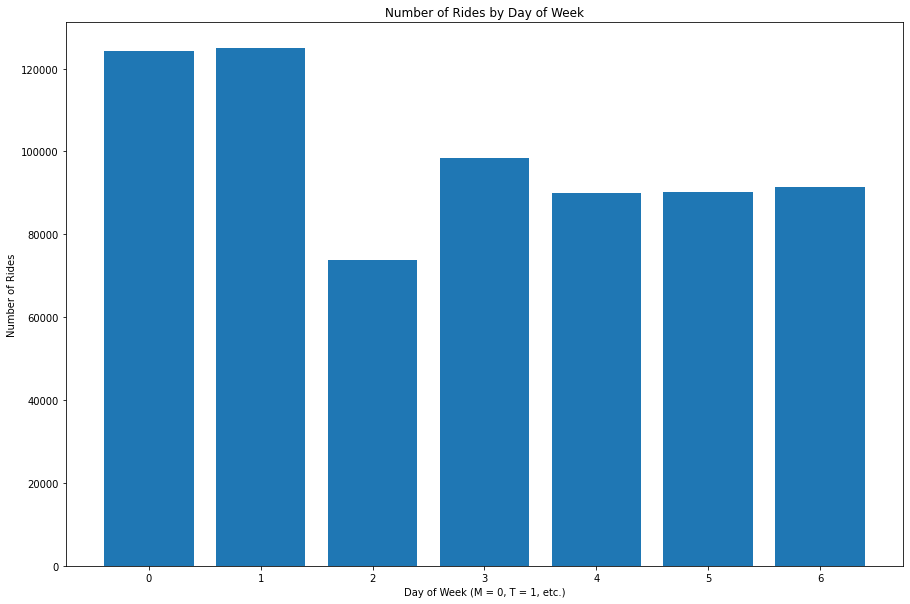

In [ ]:
plot_metric('weekday', 'Day of Week (M = 0, T = 1, etc.)', 'Number of Rides by Day of Week')

Plotting number of rides by day of week.

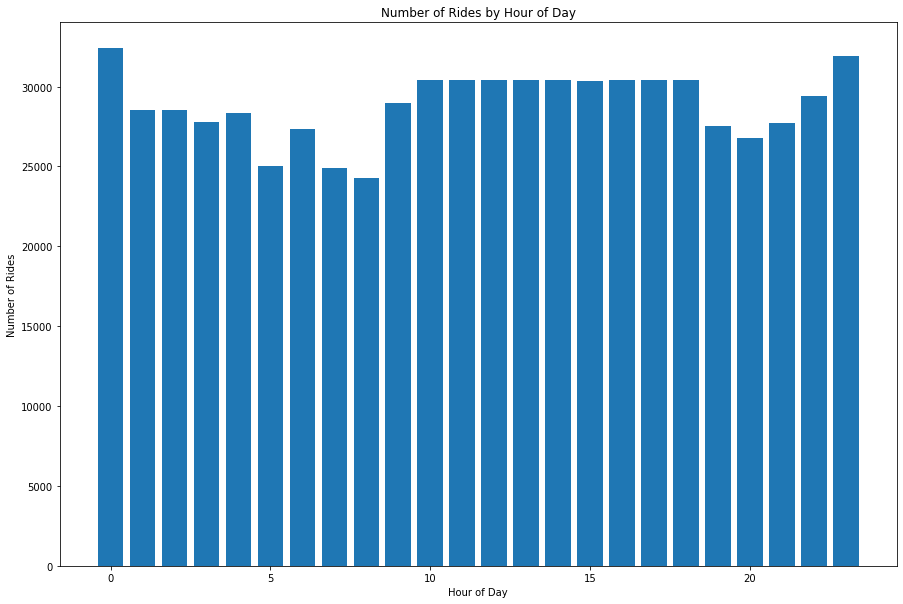

In [ ]:
plot_metric('hour', 'Hour of Day', 'Number of Rides by Hour of Day')

Plotting number of rides by hour of day.

### **MPG vs. Car Make & Model**

---

This data will be used when we make use of our cost function in order to accurately predict how much it will cost each driver to drive for Rideshare companies.

In [ ]:
# Download Data Set of Various Car Companies and Models
od.download("https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=hyundi.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: blakeandersonw
Your Kaggle Key: ··········


100%|██████████| 1.10M/1.10M [00:00<00:00, 43.8MB/s]

Kaggle Key -- {"username":"blakeandersonw","key":"5c7b7542c5ad7af0d6015b98bfa868b4"}

In [ ]:
# Download the different car companies' data
# Clean the data
# Delete any unused columns

from IPython.core.formatters import format_display_data
import pandas as pd
import numpy as np

# Get the individual datasets for each car company
audi_data = pd.read_csv("/content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/audi.csv")
bmw_data = pd.read_csv("/content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/bmw.csv")
ford_data = pd.read_csv("/content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/ford.csv")
hyundai_data = pd.read_csv("/content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/hyundi.csv")
merc_data = pd.read_csv("/content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/merc.csv")
skkoda_data = pd.read_csv("/content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/skoda.csv")
toyota_data = pd.read_csv("/content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/toyota.csv")
vauxhall_data = pd.read_csv("//content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/vauxhall.csv")
vw_data = pd.read_csv("/content/uber-fares-dataset/used-car-dataset-ford-and-mercedes/vw.csv")


# delete extra columns
audi_data.drop(columns=['price', 'transmission', 'tax', 'engineSize', 'mileage'], inplace=True)
bmw_data.drop(columns=['price', 'transmission', 'tax', 'engineSize', 'mileage'], inplace=True)
ford_data.drop(columns=['price', 'transmission', 'tax', 'engineSize', 'mileage'], inplace=True)
hyundai_data.drop(columns=['price', 'transmission', 'tax(£)', 'engineSize', 'mileage'], inplace=True)
merc_data.drop(columns=['price', 'transmission', 'tax', 'engineSize', 'mileage'], inplace=True)
skkoda_data.drop(columns=['price', 'transmission', 'tax', 'engineSize', 'mileage'], inplace=True)
toyota_data.drop(columns=['price', 'transmission', 'tax', 'engineSize', 'mileage'], inplace=True)
vauxhall_data.drop(columns=['price', 'transmission', 'tax', 'engineSize', 'mileage'], inplace=True)
vw_data.drop(columns=['price', 'transmission', 'tax', 'engineSize', 'mileage'], inplace=True)

# add the company name to all the dataframes
audi_data['carType'] = "Audi"
bmw_data['carType'] = "BMW"
ford_data['carType'] = "Ford"
hyundai_data['carType'] = "Hyundai"
merc_data['carType'] = "Mercedes"
skkoda_data['carType'] = "Skkoda"
toyota_data['carType'] = "Toyota"
vauxhall_data['carType'] = "Vauxhall"
vw_data['carType'] = "Volkswagen"

# reorder columns
audi_data = audi_data[['carType', 'model', 'year', 'mpg', 'fuelType']]
bmw_data = bmw_data[['carType', 'model', 'year', 'mpg', 'fuelType']]
ford_data = ford_data[['carType', 'model', 'year', 'mpg', 'fuelType']]
hyundai_data = hyundai_data[['carType', 'model', 'year', 'mpg', 'fuelType']]
merc_data = merc_data[['carType', 'model', 'year', 'mpg', 'fuelType']]
skkoda_data = skkoda_data[['carType', 'model', 'year', 'mpg', 'fuelType']]
toyota_data = toyota_data[['carType', 'model', 'year', 'mpg', 'fuelType']]
vauxhall_data = vauxhall_data[['carType', 'model', 'year', 'mpg', 'fuelType']]
vw_data = vw_data[['carType', 'model', 'year', 'mpg', 'fuelType']]

# check for any NaN inputs
audi_data.isnull().any()
bmw_data.isnull().any()
ford_data.isnull().any()
hyundai_data.isnull().any()
merc_data.isnull().any()
skkoda_data.isnull().any()
toyota_data.isnull().any()
vauxhall_data.isnull().any()
vw_data.isnull().any()

FileNotFoundError: ignored

In [ ]:
# Merge the different data tables into one complete table
# Get the average MPG by car make, model, and year

merge_items = ["carType", "model", "year", "mpg", "fuelType"]

# merge all the dataframes
cars_outer = audi_data.merge(bmw_data, on=merge_items, how="outer").merge(
    ford_data, on=merge_items, how="outer").merge(hyundai_data, on=merge_items, how="outer").merge(
        merc_data, on=merge_items, how="outer").merge(skkoda_data, on=merge_items, how="outer").merge(
            toyota_data, on=merge_items, how="outer").merge(vauxhall_data, on=merge_items, how="outer").merge(
                vw_data, on=merge_items, how="outer")

# random sample from merged dataframe
cars_outer = cars_outer.sample(n=200)

# Groupby car make, model, and year to get the average MPG
# Plot to see distribution of mpg amongst random car makes and models
cars_outer.groupby(['carType', 'model', 'year'])[['mpg']].mean().plot.hist(bins=25)

NameError: ignored